In [1]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## Time series analysis

In [2]:
df_energy_climate_2020 = pd.read_csv('../../data/prepared/df_energy_climate_2020.csv')

In [3]:
# difference
df_energy_climate_2020['energy_price_diff'] = df_energy_climate_2020['energy_price'].diff()

# difference in percentage
df_energy_climate_2020['energy_price_diff_pct'] = df_energy_climate_2020['energy_price'].pct_change()

# moving average
df_energy_climate_2020['energy_price_moving_avg'] = df_energy_climate_2020['energy_price'].rolling(3, min_periods=1).mean()


df_energy_climate_2020['energy_price_moving_avg'].head(10)

0    38.600000
1    37.575000
2    35.823333
3    33.240000
4    31.103333
5    30.386667
6    30.103333
7    30.273333
8    30.433333
9    30.523333
Name: energy_price_moving_avg, dtype: float64

In [4]:
# check correlation with energy_price shifted one day later
df_energy_climate_2020['energy_price_shift'] = df_energy_climate_2020['energy_price'].shift()

df_energy_climate_2020.corr(numeric_only=True)

,wind_speed,solar_radiation,tempreture,nuclear_power,not_renewable,renewable,energy_price,energy_price_diff,energy_price_diff_pct,energy_price_moving_avg,energy_price_shift
wind_speed,1.000000,0.096488,-0.109658,-0.050952,-0.379269,0.804260,-0.444114,0.057136,0.031028,-0.472748,-0.462998
solar_radiation,0.096488,1.000000,0.548614,-0.254697,-0.186633,0.478710,-0.216114,-0.012361,-0.025255,-0.211590,-0.212017
tempreture,-0.109658,0.548614,1.000000,-0.319468,-0.243570,0.076419,-0.065411,0.034561,-0.016080,-0.077886,-0.076763
nuclear_power,-0.050952,-0.254697,-0.319468,1.000000,0.407899,-0.135583,0.373059,0.008674,0.000301,0.378761,0.370190
not_renewable,-0.379269,-0.186633,-0.243570,0.407899,1.000000,-0.460238,0.797350,0.029841,-0.004245,0.804779,0.787579
renewable,0.804260,0.478710,0.076419,-0.135583,-0.460238,1.000000,-0.513584,-0.060192,0.000382,-0.504660,-0.493715
energy_price,-0.444114,-0.216114,-0.065411,0.373059,0.797350,-0.513584,1.000000,0.165374,0.017544,0.960193,0.945429
energy_price_diff,0.057136,-0.012361,0.034561,0.008674,0.029841,-0.060192,0.165374,1.000000,0.099069,-0.097464,-0.164991
energy_price_diff_pct,0.031028,-0.025255,-0.016080,0.000301,-0.004245,0.000382,0.017544,0.099069,1.000000,-0.008278,-0.015203
energy_price_moving_avg,-0.472748,-0.211590,-0.077886,0.378761,0.804779,-0.504660,0.960193,-0.097464,-0.008278,1.000000,0.992455


## Autocorrelation

In [5]:
import statsmodels.api as sm

In [6]:
df_energy_2019_to_2020_by_day = pd.read_csv('../../data/prepared/df_energy_2019_to_2020_by_day.csv')


In [7]:
plt.rcParams['figure.figsize'] = (12, 8)

/Users/mikigerlach/opt/anaconda3/envs/Techlabs/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


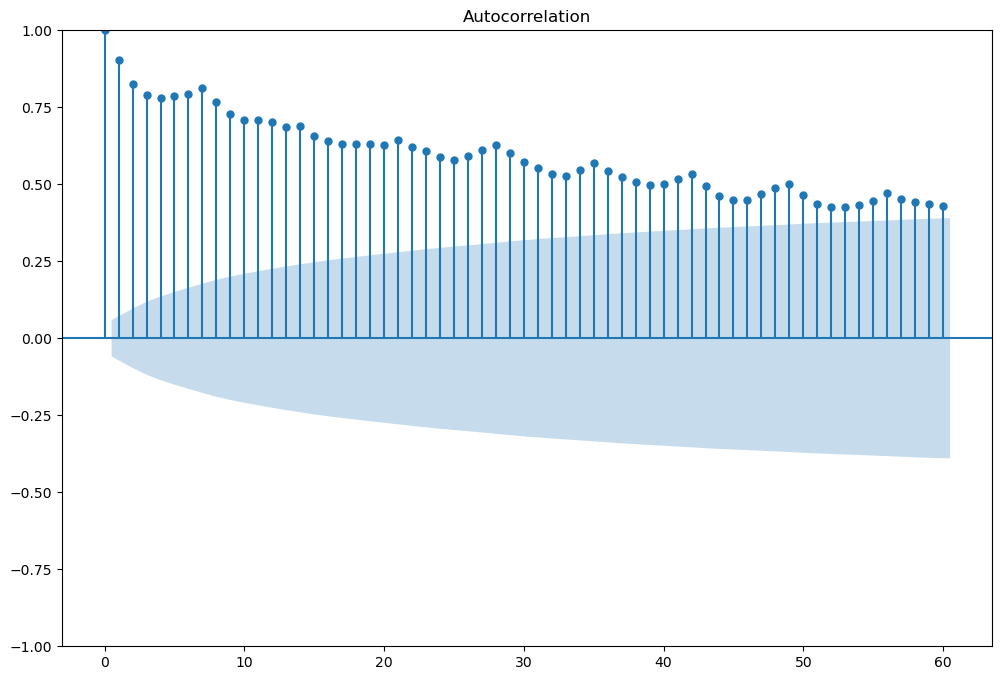

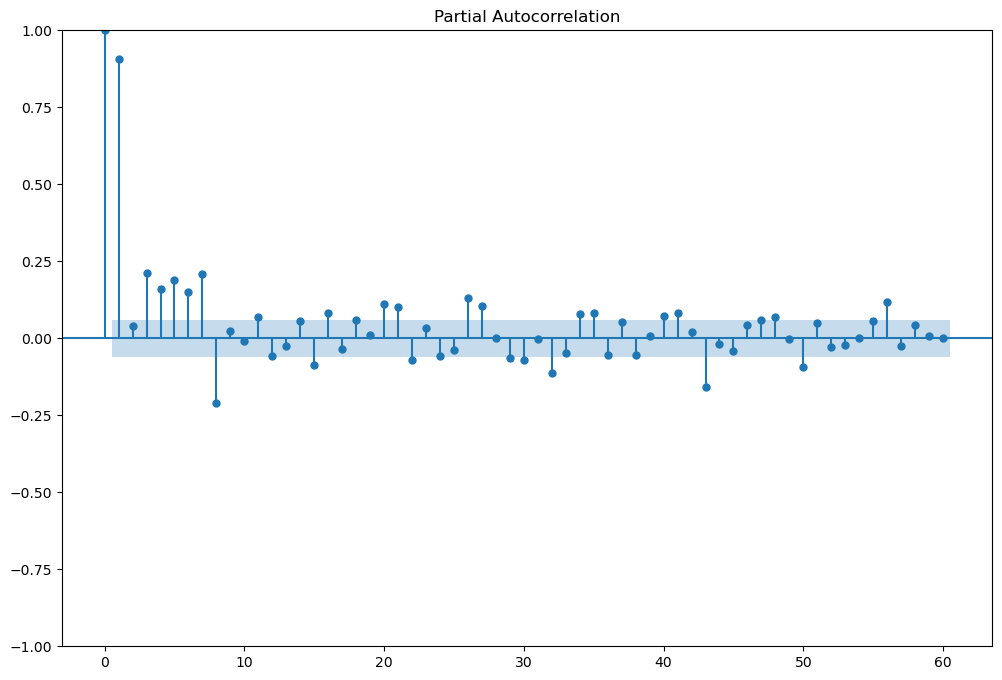

In [8]:
acf = plot_acf(df_energy_2019_to_2020_by_day['energy_price'], lags=60)
pacf = plot_pacf(df_energy_2019_to_2020_by_day['energy_price'], lags=60)

In [9]:
acf = sm.tsa.acf(df_energy_2019_to_2020_by_day['energy_price'], nlags = 60)
pacf = sm.tsa.pacf(df_energy_2019_to_2020_by_day['energy_price'], nlags = 60)
print('acf: ', acf, 'pacf: ', pacf)

acf:  [1.         0.90441227 0.82524946 0.7909448  0.78022993 0.7858688
 0.79444365 0.81117864 0.7684769  0.72843656 0.708734   0.70885831
 0.70322616 0.68756985 0.6878406  0.65773693 0.64173266 0.6296539
 0.6308417  0.62951338 0.62813603 0.6430765  0.62199013 0.60744674
 0.58938985 0.57721848 0.59055248 0.61217157 0.6276872  0.60315172
 0.57353494 0.55296877 0.53494833 0.52844455 0.54490467 0.56755679
 0.54397656 0.52340649 0.50627106 0.49623942 0.50082709 0.516024
 0.53215171 0.49447683 0.46216371 0.44743008 0.44991676 0.46799502
 0.48788582 0.50097433 0.46375935 0.43716943 0.42584152 0.42628556
 0.43350794 0.4462156  0.47048683 0.45108197 0.44098631 0.43489988
 0.43047715] pacf:  [ 1.00000000e+00  9.05238222e-01  4.04439318e-02  2.12817622e-01
  1.61191283e-01  1.89033000e-01  1.51557090e-01  2.07103465e-01
 -2.10925656e-01  2.22239821e-02 -9.14996283e-03  7.04985964e-02
 -5.71216141e-02 -2.55337679e-02  5.49178066e-02 -8.60831533e-02
  8.15913719e-02 -3.62320390e-02  6.06258256e-02

Partial autocorrelation
- significant correlation with lag 1 => Autoregression of order 1
- negative correlation with lag 9
- no correlation from 60 lags
- no seasonality